In [54]:
from syllog_model import SyllogPyroModel, get_diagonal_gaussian_factors
model = SyllogPyroModel(
    nodes=[
        {'name': 'a', 'type': 'evidence'}, 
        {'name': 'b', 'type': 'evidence'}, 
        {'name': 'c', 'type': 'evidence'}, 
        {'name': 'd', 'type': 'evidence'}, 
    ],
    edges=[
        ['a','c'],
        ['b','c'],
        ['c','d']
    ]
)
factors = get_diagonal_gaussian_factors(model.get_factor_descriptions())

In [55]:
model.get_factor_descriptions()

{'a': [], 'b': [], 'c': ['a', 'b'], 'd': ['c']}

In [56]:
import torch
from torch.distributions import Normal, Bernoulli

In [57]:
factors = {
    'a': lambda *params: Normal(0, 1).sample(),
    'b': lambda *params: Normal(0, 1).sample(),
    'c': lambda a, b: Normal(a, torch.abs(b)).sample(),
    'd': lambda c: Bernoulli(torch.sigmoid(c)).sample()
}

In [58]:
measurements = [model(factors) for i in range(100)] # gotta put in batching

In [59]:
import matplotlib.pyplot as plt

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

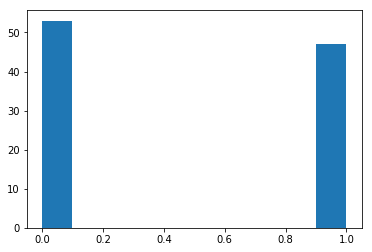

In [61]:
plt.hist(measurements)